In [22]:
# Carga paquetes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib as plt
import warnings
from scipy.stats import skew

warnings.filterwarnings("ignore", category=UserWarning)  # ignora los warnings

In [12]:
# Configuración para evitar la notación científica
pd.options.display.float_format = '{:.0f}'.format

# Carga de la base
#inpath = "E:/OneDrive/Datasets/Tuboleta/Segmentacion/"
inpath = "C:/Users/diego.torres/OneDrive/Datasets/Tuboleta/Segmentacion/"

tb_ini = pd.read_csv(inpath + 'Base_segmentacion.csv',delimiter='|',decimal=".")
tb_ini.fillna(0, inplace=True)

print('Dimensiones:')
print(tb_ini.shape)
print(tb_ini.columns)
print(tb_ini.head(10))

Dimensiones:
(78960, 5)
Index(['Cliente', 'Eventos', 'Recaudo', 'Boletas', 'ATP'], dtype='object')
         Cliente  Eventos   Recaudo  Boletas   ATP
0 10228288389474       33 430579324     6391 67373
1 10228361265078      162 173802000     2057 84493
2 10229202378374      115  77480444     1842 42063
3 10229436653239        3  71830000     1288 55769
4   101429949720       80  56067900     1253 44747
5   101394685671       99  49779775     1143 43552
6 10228462846111       57  26934600      663 40625
7 10229345897958        1   4405000      500  8810
8 10228538980483       18   6580292      482 13652
9 10228352284052       30  12265000      393 31209


    Recaudo  count
0         0   1621
1      7500      1
2      9500      5
3     10000     58
4     10200      4
5     10500      1
6     10724      9
7     10909      2
8     12000      3
9     12100      1
10    12500      7
11    12600      1
12    13215      9
13    13300      1
14    13406      8
15    13600      3
16    13636     10
17    13810      7
18    14000      4
19    14500      2


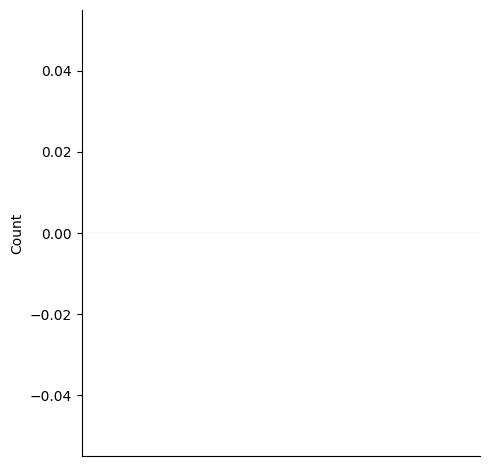

In [31]:
# tb = tb_ini[['Cliente','Eventos','Recaudo','Boletas','ATP','Valor','EMAIL','Rango_de_edad']].\
#     sort_values(by='Recaudo', ascending=False).\
#     head(200)
# #tb = tb_ini[(tb_ini['Eventos'] == 0) | (tb_ini['Recaudo'] == 0) | (tb_ini['Boletas'] == 0)]
# print('Dimensiones:')
# print(tb.shape)
# print(tb.head(5))
variable = 'Recaudo'
#variable.plot()
sns.displot(variable, bins = 30, binrange=(1, 1000))
plt.xlim(1, 20)
#plt.plot(variable)
variable_grp = tb_ini.groupby(variable).agg(count=(variable, 'count')).reset_index()
print(variable_grp.head(20))
#VarTemp = variable[(variable >= 70000)]
#print(VarTemp.count())

In [32]:
variable = [variable]
# RANGO INTERCUARTILICO
def IQR(variable):
  Iqr = np.percentile(variable,75)-np.percentile(variable,25)

  LI=np.percentile(variable,25)-(1.5*Iqr)
  LS=np.percentile(variable,75)+(1.5*Iqr)
  return(LI,LS)

print(IQR(variable))

# Comprobamos normalidad, sino, transformamos con log para reducir
# sesgo a la derecha:
#Ejecutamos las dos funciones anteriores
skew_lim = 2

# Eventos
if skew(variable) > skew_lim:
  # Aplicar logaritmo a var_eventos si la asimetría es mayor que skew
  variable = np.log(variable)
  #rfm_df.loc[:, 'Eventos_t'] = var_eventos # esta sintaxis evita el warning 'SettingWithCopyWarning'
  #rfm_df['Eventos_t'] = var_eventos  # Asignar var_eventos a una columna Eventos_t en rfm_df
  lim_eventos = IQR(variable)  # Calcular el rango intercuartílico de var_eventos
else:
  lim_eventos = IQR(variable)

print(lim_eventos)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U7'), dtype('<U7')) -> None

In [9]:
LI = lim_eventos[0]
LS = lim_eventos[1]

# variable tiene outliers, VarTemp no
VarTemp = variable[(variable >= LI) & (variable <= LS)]

## TIPO DE INTERVALO O BREAK
# valores en el que se dividen los intervalos.
# los datos atipicos se apartan a la hora de definir los quantiles, pero se incluyen al final para el puntaje
# break_1: <LI + min; percentiles -1 y 6; max + >LS
breaks_1 = np.concatenate(([min(variable) - 0.001]\
  ,np.percentile(VarTemp, np.arange(0, 101, 20)[1:5]) #np.arange(start, stop, step), stop excluded so +1/
  ,[max(variable) + 0.001]))

print(breaks_1)

# break_2: quantiles con outliers
quantiles_2 = np.percentile(variable, np.arange(0, 101, 20))
quantiles_2[0] -= 0.001
quantiles_2[-1] += 0.001
breaks_2 = quantiles_2

print(breaks_1)

# break_3: Usandos rangos fijos y no quantiles incluyendo outliers
breaks_3 = np.linspace(min(variable) - 0.001, max(VarTemp), num=6)
breaks_3 = np.append(breaks_3[0:5], max(variable))

print(breaks_1)

(78960, 1)
Index(['Eventos'], dtype='object')
   Eventos
0       33
1      162
2      115
3        3
4       80
5       99
6       57
7        1
8       18
9       30
1.0
1.0 1.0


TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [20]:
# Escritura
tb.to_excel(inpath +'resultados_segmentacion_databricks.xlsx',
               index=False, # El argumento 'index=False' evita que se incluyan los índices en el archivo CSV
               #sep = '|',
               #decimal = '.'
               )